In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Aim is to predict the marks of students of the test data

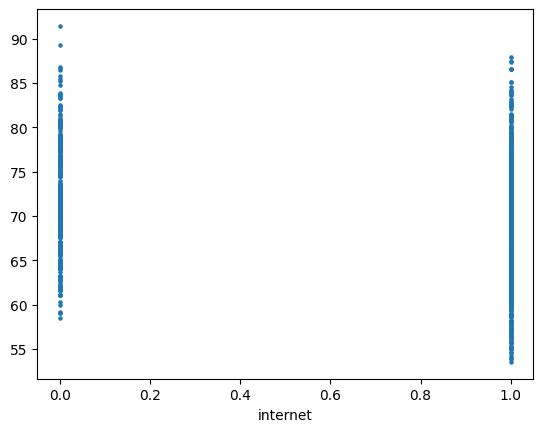

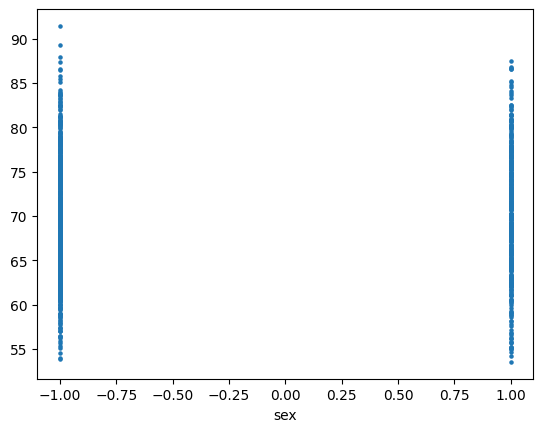

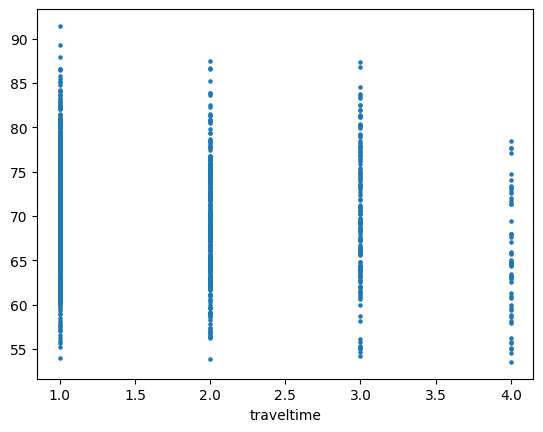

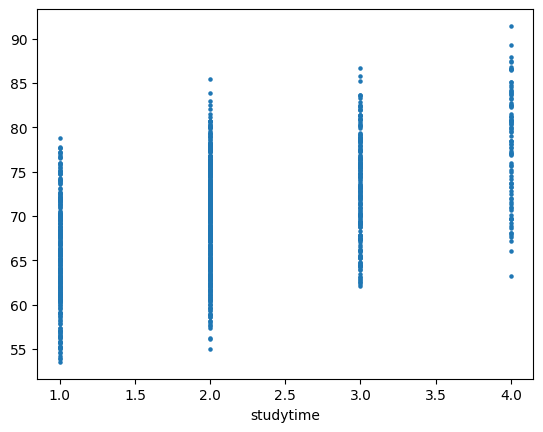

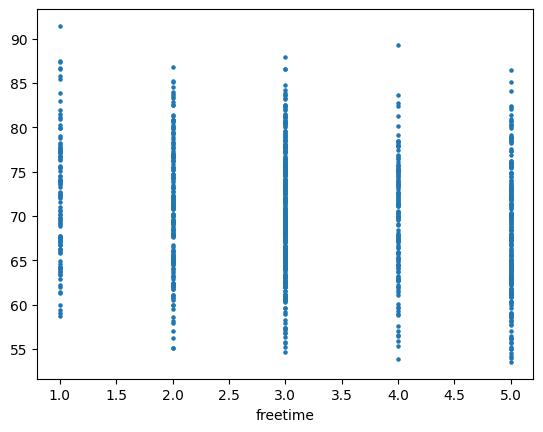

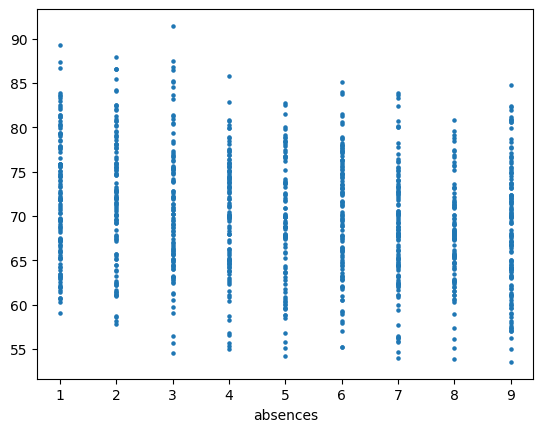

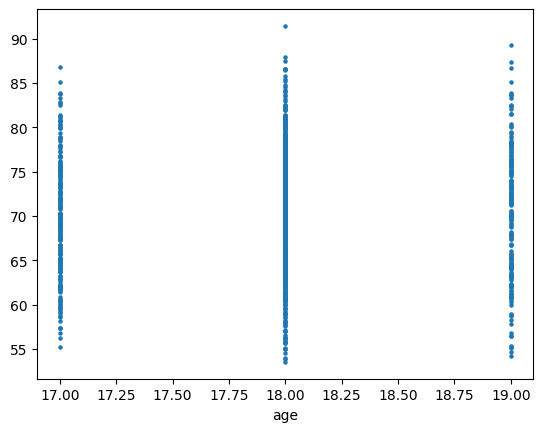

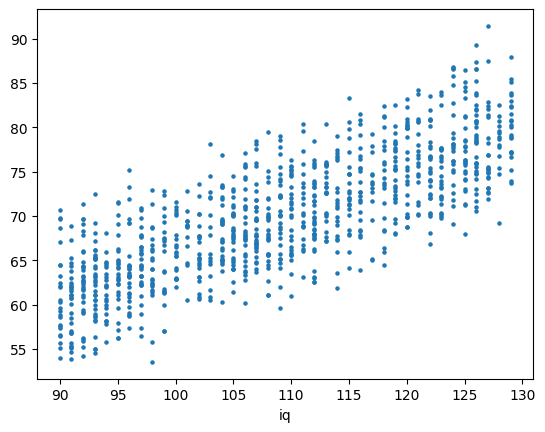

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):

    for i in range(x_train.shape[0]):
        x_train[i, 0] = 0 if x_train[i, 0] == 'no' else 1
        x_train[i, 1] = 1 if x_train[i, 1] == 'F' else -1
    return x_train

x_train = feature_changing(x_train)

for i in range(x_train.shape[1]):
    plt.figure()
    plt.scatter(x_train[:, i], y_train, s= 5)
    plt.xlabel(data.columns[i])

# New Section

In [3]:
def z_score(x_train):

    x_mean = np.mean(x_train, axis= 0)
    x_std = np.std(x_train, axis= 0)
    x_train = (x_train - x_mean)/x_std

    return x_train,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):

    loss = 0
    size = x_train.shape[0]

    for i in range(size):
        error = np.dot(x_train[i], w)[0] + b - y_train[i]
        error = error[0]
        loss += error**2

    loss /= 2*size
    return loss

In [5]:
def gradient_descent(x_train,y_train,w,b):

    alpha = 3.16e-2

    size, features = x_train.shape
    grad_w = np.zeros((features, 1))
    grad_b = 0

    for i in range(size):
        delta = np.dot(x_train[i], w) + b - y_train[i]
        delta = delta[0]
        grad_b += delta
        for j in range(features):
            grad_w[j] += delta*x_train[i, j]

    grad_w /= size
    grad_b /= size
    w = w - alpha*grad_w
    b = b - alpha*grad_b

    return w,b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0
while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
print(w, b)
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5:
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

[[-1.39642001e+00]
 [ 1.27179894e-04]
 [-8.99051511e-01]
 [ 3.46009775e+00]
 [-1.26784287e+00]
 [-1.47678328e+00]
 [ 1.63382726e-01]
 [ 5.35030456e+00]] [69.93982285]
Congratulations, your accuracy is 100.0%
